# Datos

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np

In [59]:
datosPvsV=pd.read_csv('datos P vs V.txt')
datosPvsV.name='P vs v'

datosPvsT=pd.read_csv('datos P vs T.txt')
datosPvsT.name='P vs T'

print(datosPvsV)
print('-----------------------------------------------------')
print(datosPvsT)

   V(mL)     P(kPa)      T(C)  1/V(1/mL)
0     16  71.325601  9.552031   0.062500
1     14  72.276385  9.555319   0.071429
2     12  73.144320  9.565182   0.083333
3     10  73.976748  9.571756   0.100000
4      8  74.895971  9.604619   0.125000
5      6  75.704728  9.586547   0.166667
6      4  76.722580  9.619401   0.250000
-----------------------------------------------------
   V(mL)     P(KPa)       T(C)
0      4  82.510129  31.963705
1      4  82.024874  29.614123
2      4  81.776329  28.160056
3      4  81.622468  27.180295
4      4  81.468607  25.742348
5      4  81.204281  24.762555
6      4  81.074091  23.633722


## Análisis Cuantitativo

Gráficas

Text(0.5, 1.0, 'P vs 1/V')

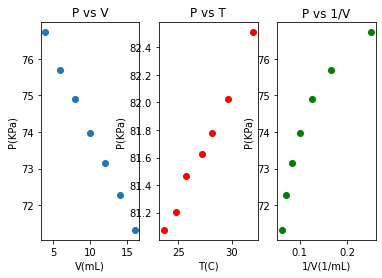

In [60]:
fig, ax = plt.subplots(1,3)

ax[0].scatter(datosPvsV['V(mL)'],datosPvsV['P(kPa)'])
ax[0].set_ylabel('P(KPa)')
ax[0].set_xlabel('V(mL)')
ax[0].set_title('P vs V')

ax[1].scatter(datosPvsT['T(C)'],datosPvsT['P(KPa)'],color='red')
ax[1].set_ylabel('P(KPa)')
ax[1].set_xlabel('T(C)')
ax[1].set_title('P vs T')

ax[2].scatter(datosPvsV['1/V(1/mL)'],datosPvsV['P(kPa)'],color='green')
ax[2].set_ylabel('P(KPa)')
ax[2].set_xlabel('1/V(1/mL)')
ax[2].set_title('P vs 1/V')


 Ajuste datos P vs V (Logger Pro):

P = A*V^B
A: 82,15 +/- 0,6947(KPa/mL)
B: -0,04662 +/- 0,003951(adimensional)
Correlation: 0,9859

El exponente al ser negativo, nos indica la relación inversamente de crecimiento entre el volumen y la presión, a mayor magnitud, mayor es esta relación inversa de crecimiento; es decir para un mismo incremento de volumen habrá una mayor disminución de presión, se cumple u resultado similar si la la magnitud es menor.

Ajuste de datos lineal P vs V:

$$P=\frac{1}{V}m+b$$

Hacemos una ajuste lineal P vs V.
 
El ajuste es P(1/V)=m*(1/V)+b,tiene como parametros:
 
m=(26.72+-4.823)KPa*mL, b=(70.73+-0.662)kpa.
Gráficando el ajuste y comparando los puntos experimentales tenemos:


Text(0.5, 1.0, 'P vs V')

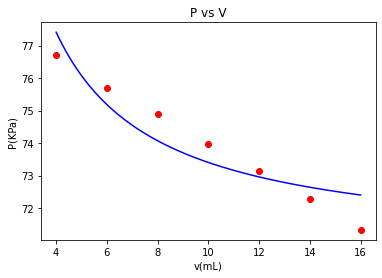

In [61]:
def func(x, m, b):
    return m*x+b

print('Hacemos una ajuste lineal P vs V.')
print(' ')
ajuste,covarianza= curve_fit(func,datosPvsV['1/V(1/mL)'].tolist(),datosPvsV['P(kPa)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
m=round(ajuste[0],2)
b=round(ajuste[1],2)
Δm=round(desviacionestandar[0],3)
Δb=round(desviacionestandar[1],3)
print('El ajuste es P(1/V)=m*(1/V)+b,tiene como parametros:')
print(' ')
print(str('m=(')+str(m)+str('+-')+str(Δm)+str(')KPa*mL,'),str('b=(')+str(b)+str('+-')+str(Δb)+str(')kpa.'))
print('Gráficando el ajuste y comparando los puntos experimentales tenemos:')

fig,ax = plt.subplots() 
x0=datosPvsV['V(mL)'].tolist()[0]
xf=datosPvsV['V(mL)'].tolist()[-1]
x=np.linspace(x0,xf,1000)
ax.scatter(datosPvsV['V(mL)'],datosPvsV['P(kPa)'],color='red')
ax.plot(x,(1/x)*m+b,color='blue')
ax.set_xlabel('v(mL)')  
ax.set_ylabel('P(KPa)')  
ax.set_title('P vs V')


m significa la variación de la presión con el inverso de la temperatura.

Ajuste de datos lineal P vs T:

$$P=mT+b$$

Hacemos una ajuste lineal P vs T.
 
El ajuste es P(T)=m*(T)+b,tiene como parámetros:
 
m=(0.17+-0.007)KPa/C, b=(77.04+-0.19)KPa.
Gráficando el ajuste y comparando los puntos experimentales tenemos:


Text(0.5, 1.0, 'P vs T')

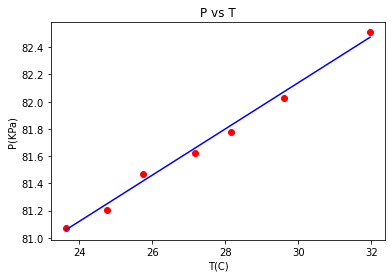

In [97]:
def func(x, m, b):
    return m*x+b

print('Hacemos una ajuste lineal P vs T.')
print(' ')
ajuste,covarianza= curve_fit(func,datosPvsT['T(C)'].tolist(),datosPvsT['P(KPa)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
m=round(ajuste[0],2)
b=round(ajuste[1],2)
Δm=round(desviacionestandar[0],3)
Δb=round(desviacionestandar[1],3)
print('El ajuste es P(T)=m*(T)+b,tiene como parámetros:')
print(' ')
print(str('m=(')+str(m)+str('+-')+str(Δm)+str(')KPa/C,'),str('b=(')+str(b)+str('+-')+str(Δb)+str(')KPa.'))
print('Gráficando el ajuste y comparando los puntos experimentales tenemos:')

fig,ax = plt.subplots() 
x0=datosPvsT['T(C)'].tolist()[0]
xf=datosPvsT['T(C)'].tolist()[-1]
x=np.linspace(x0,xf,1000)
ax.scatter(datosPvsT['T(C)'],datosPvsT['P(KPa)'],color='red')
ax.plot(x,x*m+b,color='blue')
ax.set_xlabel('T(C)')  
ax.set_ylabel('P(KPa)')  
ax.set_title('P vs T')


m significa en este caso el aumento de presión a cada unidad de temperatura

Estimando la densidad del aire

$$P=mT+b$$
$$P=\frac{R \rho }{M}T$$


Hacemos una ajuste lineal P vs T.
 
El ajuste es P(T)=m*(T)+b,tiene como parámetros:
 
m=(0.27+-0.0)KPa/C,
De la ecuación anterior, la densidad del aire es: 0.9406807794082273 kg/m**3
Gráficando el ajuste y comparando los puntos experimentales tenemos:


Text(0.5, 1.0, 'P vs T')

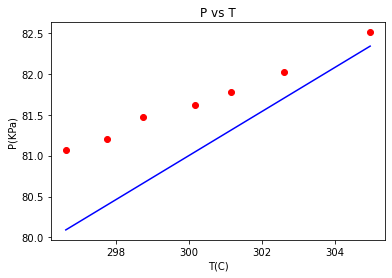

In [96]:
def func(x, m):
    return m*x

print('Hacemos una ajuste lineal P vs T.')
print(' ')
ajuste,covarianza= curve_fit(func,(datosPvsT['T(C)']+273).tolist(),datosPvsT['P(KPa)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
m=round(ajuste[0],2)
Δm=round(desviacionestandar[0],3)
print('El ajuste es P(T)=m*(T)+b,tiene como parámetros:')
print(' ')
print(str('m=(')+str(m)+str('+-')+str(Δm)+str(')KPa/C,'))
R=8.314#J/mol*k
M=28.966#kg/mol
rho=(m*M)*(1/R)
#m tiene unidades Kpa/C=kPa/K=(10**3)Pa/K
#rho tiene unidades (kg/mol)*(10**3)Pa/K*(mol*K/J)=(10**3)*kg*Pa/J=kg*(Newton/m**2)*(1/Newton*m)=kg/m**3*(10**3)
print('De la ecuación anterior, la densidad del aire es:',rho,'kg/m**3')
print('Gráficando el ajuste y comparando los puntos experimentales tenemos:')

fig,ax = plt.subplots() 
x0=(datosPvsT['T(C)']+273).tolist()[0]
xf=(datosPvsT['T(C)']+273).tolist()[-1]
x=np.linspace(x0,xf,1000)
ax.scatter((datosPvsT['T(C)']+273),datosPvsT['P(KPa)'],color='red')
ax.plot(x,x*m,color='blue')
ax.set_xlabel('T(C)')  
ax.set_ylabel('P(KPa)')  
ax.set_title('P vs T')
